<a href="https://colab.research.google.com/github/Makarov1e/BotProject/blob/main/labs/%D0%9B%D0%A03_%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

csv_file = pd.read_csv("monster_com_job_sample.csv")
print(csv_file.sample(10))

                        country country_code date_added has_expired         job_board                                    job_description                                          job_title              job_type                location               organization                                           page_url                         salary                               sector                           uniq_id
10729  United States of America           US        NaN          No  jobs.monster.com  Project Coordinator needed for a contract oppo...        Project Coordinator Job Job in Collegeville    Full Time Employee        Collegeville, PA  Business Services - Other  http://jobview.monster.com/project-coordinator...                            NaN           Project/Program Management  aca8e35ae3a20f350f03b9c08486a3f6
3997   United States of America           US        NaN          No  jobs.monster.com  The Helen Ross McNabb Center (www.mcnabbcenter...       Knox Adult ICM Case Manager J

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` |
```country_code``` |
```date_added``` |
```has_expired``` |
```job_board``` |
```job_description``` |
```job_title``` |
```job_type``` |
```location``` |
```organization``` |
```page_url``` |
```salary``` |
```sector``` |
```uniq_id``` |

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64
Empty DataFrame
Columns: [country, country_code, date_added, has_expired, job_board, job_description, job_title, job_type, location, organization, page_url, salary, sector, uniq_id]
Index: []


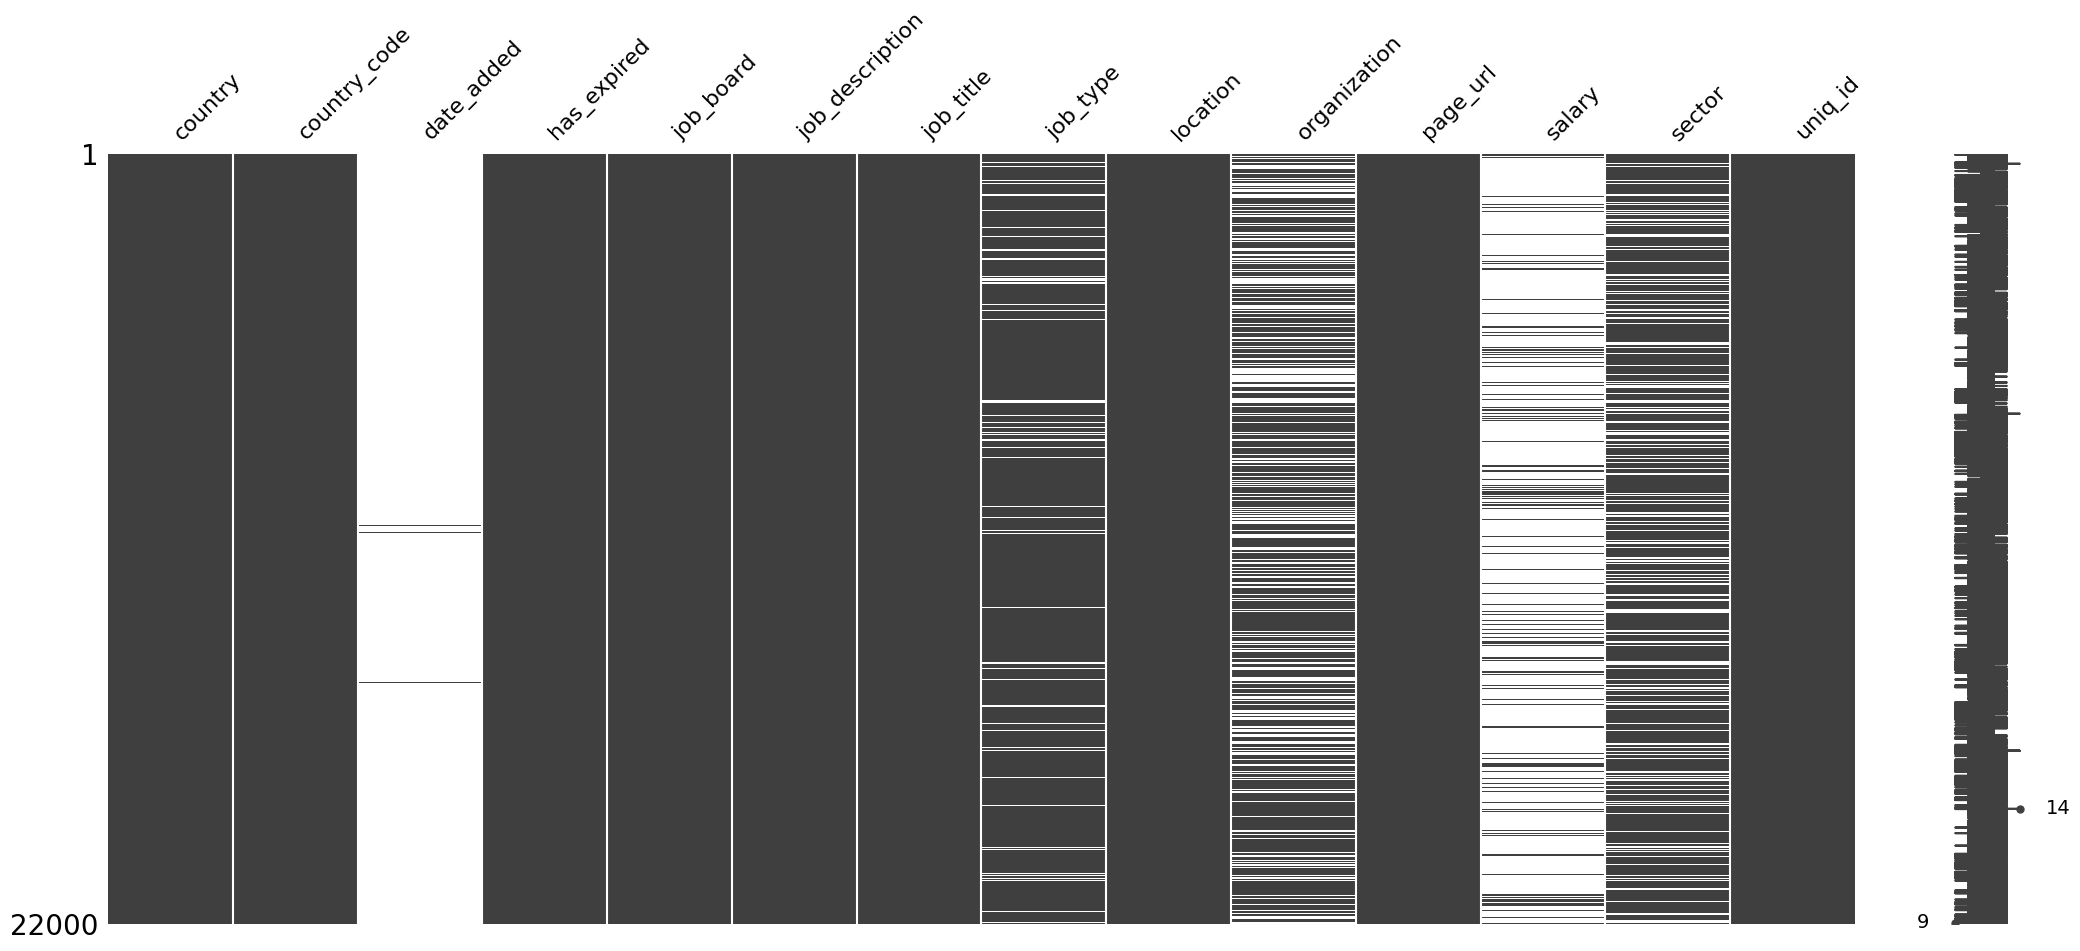

In [20]:
# Пустые значения столбцов датасета.
csv_file = pd.read_csv("monster_com_job_sample.csv")
print(csv_file.isna().sum())

# Количество строк с пропуском больше 75 (Всего 22000)
csv_file = csv_file.replace('', pd.NA)

missing_rows = csv_file.isna().mean(axis=1)
print(csv_file[missing_rows > 0.75])

# График пропусков.
msno.matrix(csv_file)
plt.savefig("plot.png")

Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [21]:
# Так как в столбце date_added почти все пустое, не имеет смысл даже првоерять, потому что у нас удалиться почти весь дата сет. Вывод -> так мы делать не будем.

### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [23]:
#1) Да есть. Например country, country_code, job_board и has_expired, их можно удалить или заменить на булевы значения.
#2) Нет
#3) Да, в job_title пишут все подряд, но в основном соответствует.

### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [24]:
csv_file = pd.read_csv("monster_com_job_sample.csv")
print(len(csv_file)) #22000
print(len(csv_file["uniq_id"].unique())) #22000
# Если из 22000 значений 22000 уникальны, значит все уникальны.

for _ in csv_file:
    uniq = len(csv_file[_].unique())
    if uniq == 22000:
        print(print(f"{_}: все значения уникальны.\n\n"))
    else:
        print(print(f"{_}: не все значения уникальны.\n\n"))

# Уникальные значения толлько в последнем столбце с id.


temp_df = csv_file.drop(columns="uniq_id")
duplicates = temp_df[temp_df.duplicated(keep=False)]

# Выводит пустой датафрейм, поэтому нет повторяющихся

22000
22000
country: не все значения уникальны.


None
country_code: не все значения уникальны.


None
date_added: не все значения уникальны.


None
has_expired: не все значения уникальны.


None
job_board: не все значения уникальны.


None
job_description: не все значения уникальны.


None
job_title: не все значения уникальны.


None
job_type: не все значения уникальны.


None
location: не все значения уникальны.


None
organization: не все значения уникальны.


None
page_url: все значения уникальны.


None
salary: не все значения уникальны.


None
sector: не все значения уникальны.


None
uniq_id: все значения уникальны.


None


# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

In [43]:
from collections import defaultdict

patterns = {
    "City, State, Index": r"^[A-Za-z\s]+,\s[A-Z]{2}\s\d{5}$",
    "City, State": r"^[A-Za-z\s]+,\s[A-Z]{2}$",
    "City, Index": r"^[A-Za-z\s]+\s\d{5}$",
    "State, Index": r"^[A-Z]{2}\s\d{5}$",
    "Index": r"^\d{5}$",
    "State": r"^[A-Z]{2}$",
    "City": r"^[A-Za-z\s]+$"
}

def find_format(location):
  for name, pattern in patterns.items():
    if re.fullmatch(pattern, str(location).strip()):
        return name
  return "Unknown"

lst = defaultdict(int)
for loc in df['location']:
  lst[find_format(loc)] += 1

df['location_format'] = df['location'].apply(find_format)

print("Распределение форматов:", dict(lst))

Распределение форматов: {'City, State, Index': 11328, 'Unknown': 2036, 'City, State': 7112, 'City': 692, 'City, Index': 348, 'Index': 254, 'State': 230}


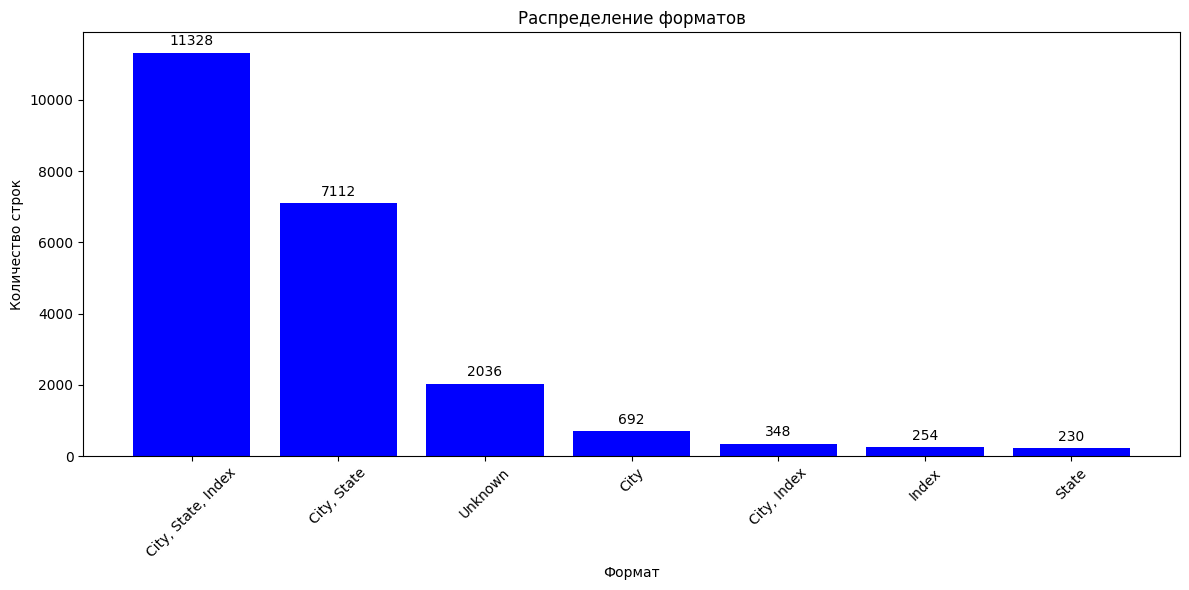

In [44]:
#3)
labels = list(lst.keys())
values = list(lst.values())

plt.figure(figsize=(12, 6))
format_counts = df['location_format'].value_counts()
bars = plt.bar(format_counts.index, format_counts.values, color='blue')
plt.bar_label(bars, labels=format_counts.values, padding=3)
plt.title("Распределение форматов")
plt.xlabel("Формат")
plt.ylabel("Количество строк")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [45]:
def extract_location_info(location):
    city = None
    state = None
    zip_code = None

    # Поиск почтового индекса
    zip_match = re.search(r'\b\d{5}\b', location)
    if zip_match:
        zip_code = int(zip_match.group())  # Преобразование в целое число

    # Поиск кода штата
    state_match = re.search(r'[A-Z]{2}', location)
    if state_match:
        state = state_match.group()

    # Поиск города (все, что осталось после удаления штата и индекса)
    location = re.sub(r'[A-Z]{2}|\d{5}', '', location).strip()
    city = location

    return city, state, zip_code

known_format_df = df[df['location_format'] != 'Unknown'].copy()
known_format_df[['city', 'state', 'zip_code']] = known_format_df['location'].apply(lambda x: pd.Series(extract_location_info(x)))
known_format_df['zip_code'] = known_format_df['zip_code'].astype('Int64')
known_format_df[['city', 'state', 'zip_code']].head()

,city,state,zip_code
0,"Madison,",WI,53702
1,"Madison,",WI,53708
3,"Dixon,",CA,<NA>
4,"Camphill,",PA,<NA>
5,"Charlottesville,",VA,<NA>


Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [46]:
empty_rows = known_format_df[(known_format_df['city'].isnull()) &
                            (known_format_df['state'].isnull()) &
                            (known_format_df['zip_code'].isnull())]

empty_rows[['location', 'city', 'state', 'zip_code']]


,location,city,state,zip_code


### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

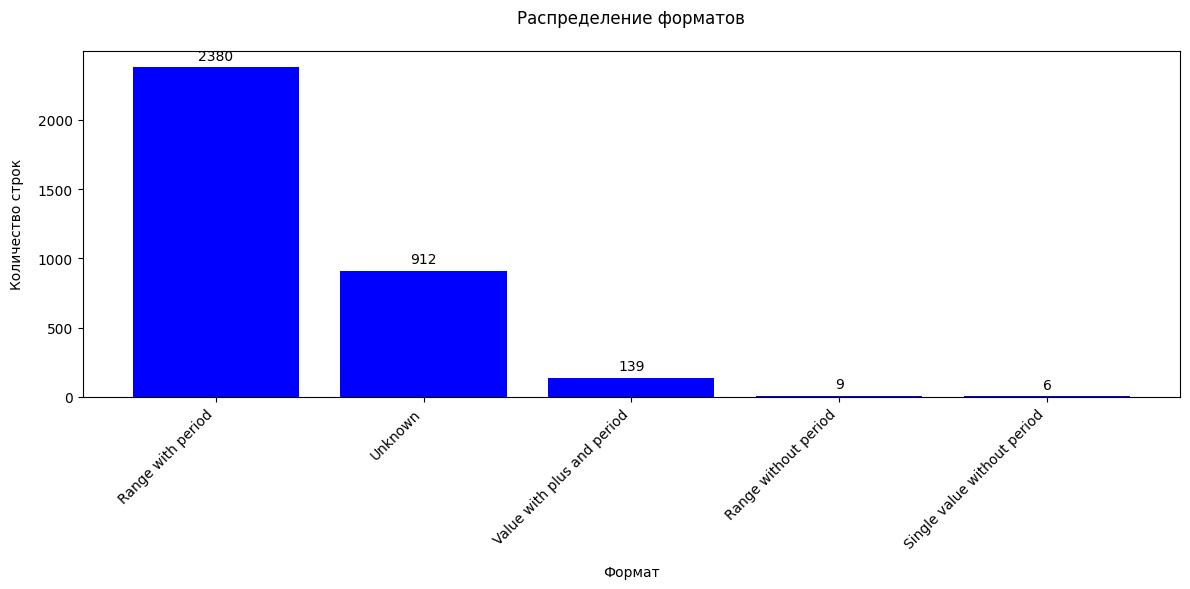

In [32]:
patterns = {
    "Range with period": r"^(?:\$?\s*\d[\d,]*\.?\d*\s*-\s*\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?\s*-\s*\$?\s*\d[\d,]*\.?\d*|\$?\s*\d[\d,]*\.?\d*\s*-\s*\d[\d,]*\.?\d*\s*\$?)\s*\/(?:hour|year|month|week)\s*$",
    "Single value with period": r"^(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*\/(?:hour|year|month|week)\s*$",
    "Range without period": r"^(?:\$?\s*\d[\d,]*\.?\d*\s*-\s*\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?\s*-\s*\$?\s*\d[\d,]*\.?\d*|\$?\s*\d[\d,]*\.?\d*\s*-\s*\d[\d,]*\.?\d*\s*\$?)\s*$",
    "Single value without period": r"^(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*$",
    "Up to value with period": r"^\s*up\s+to\s+(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*\/(?:hour|year|month|week)\s*$",
    "Up to value without period": r"^\s*up\s+to\s+(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*$",
    "Value with plus and period": r"^(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*\+\s*\/(?:hour|year|month|week)\s*$",
    "Value with plus, no period": r"^(?:\$?\s*\d[\d,]*\.?\d*|\d[\d,]*\.?\d*\s*\$?)\s*\+\s*$"
}

def find_format(salary):
    for name, pattern in patterns.items():
        if re.fullmatch(pattern, str(salary).strip()):
            return name
    return "Unknown"

df['salary_format'] = df['salary'].dropna().apply(find_format)

# Подсчет количества строк для каждого формата
format_counts = df['salary_format'].value_counts()

# Визуализация результатов
plt.figure(figsize=(12, 6))
format_counts = df['salary_format'].value_counts()
bars = plt.bar(format_counts.index, format_counts.values, color='blue')
plt.bar_label(bars, labels=format_counts.values, padding=3)
plt.title("Распределение форматов", pad=20)
plt.xlabel("Формат", labelpad=10)
plt.ylabel("Количество строк", labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
df[df['salary_format']=='Unknown']

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,location_format,salary_format
23,United States of America,US,NaN,No,jobs.monster.com,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c,city_state_zip,Unknown
42,United States of America,US,NaN,No,jobs.monster.com,Job Description:JOB SUMMARYThe Office Administ...,Office Administrator - Job in Denver,Full Time,"Denver, CO 80237",Other/Not Classified,http://jobview.monster.com/Office-Administrato...,Up to $32000.00,Experienced (Non-Manager),1f2da47e60173c6667395f081c048713,city_state_zip,Unknown
58,United States of America,US,NaN,No,jobs.monster.com,1. Do you enjoy creating partnerships an...,Sales Consultant Job in Livermore,Full Time,"Livermore, CA 94551","Electronics, Components, and Semiconductor Mfg",http://jobview.monster.com/Sales-Consultant-Jo...,"Salary, plus commission",Experienced (Non-Manager),6d01d5ecd8f9a5d605935b609e5183c0,city_state_zip,Unknown
61,United States of America,US,NaN,No,jobs.monster.com,MUST HAVE CURRENT RESTAURANT MANAG...,Upscale Casual Restaurant Managers- Gm - Agm -...,Full Time,"Houston, TX",Restaurant/Food Services,http://jobview.monster.com/Upscale-Casual-Rest...,"45,000.00 - 100,000.00 $ /yearBonus, Benefits,...",Manager (Manager/Supervisor of Staff),f15dfb5ad12ddb6acb8a26eb04f2220f,city_state,Unknown
64,United States of America,US,NaN,No,jobs.monster.com,PriMed Consulting is a medical malpractice ins...,Commercial Lines Account Manager Job in Ocean,Full Time,"Ocean, NJ 07712",Insurance,http://jobview.monster.com/Commercial-Lines-Ac...,"40,000.00 - 50,000.00 $ /yearsalary",Experienced (Non-Manager),ea722c991c6d3816965702948e320cb6,city_state_zip,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21971,United States of America,US,NaN,No,jobs.monster.com,CULINARY CAREER WEST CHESTER OHIO!EXECUTIVE CH...,EXECUTIVE CHEF WEST CHESTER OHIO $K-$K PLUS! B...,Full Time,"West Chester, OH",All,http://jobview.monster.com/EXECUTIVE-CHEF-WEST...,"75,000.00 - 85,000.00 $ /yearHighly Competitiv...",Manager (Manager/Supervisor of Staff),8e9f8638556bc1fd671bb99f4f01ac4d,city_state,Unknown
21976,United States of America,US,NaN,No,jobs.monster.com,B2B Customer Service AssociateAre you customer...,BB Customer Service Associate Job in Cincinnati,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/B2B-Customer-Servic...,"40,000.00 - 42,000.00 $ /yearProfit-sharing",Experienced (Non-Manager),470444a24879acb0569e099609030e65,city_state,Unknown
21985,United States of America,US,NaN,No,jobs.monster.com,"We are a worldwide, leading manufacturer of ro...",General Manager of Sales & Marketing Job in Ci...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/General-Manager-of-...,"negotiable salary / bonus, car, laptop, excell...","Executive (SVP, VP, Department Head, etc)",f799bdbf19691845b19e16264fb61085,city_state,Unknown
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,city_state,Unknown


#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

In [34]:
def extract_salary_info(salary):
    # Инициализация значений
    min_salary = None
    max_salary = None
    period = None

    # Удаление лишних пробелов
    salary = str(salary).strip()

    period_match = re.search(r'/(hour|year|month|week)', salary, re.IGNORECASE)
    period = period_match.group(1).lower() if period_match else None

    # Извлечение числовых значений
    numbers = re.findall(r'\d[\d,]*\.?\d*', salary)
    numbers = [float(num.replace(',', '')) for num in numbers]

    # Определение min и max зарплаты
    if len(numbers) == 0:
        min_salary, max_salary = None, None
    elif len(numbers) == 1:
        min_salary, max_salary = numbers[0], None
    else:
        min_salary, max_salary = min(numbers), max(numbers)

    return pd.Series([min_salary, max_salary, period])

df[['min_salary', 'max_salary', 'period']] = df['salary'].dropna().apply(extract_salary_info)

# Заполнение max_salary значениями min_salary, где max_salary отсутствует
df['max_salary'] = df['max_salary'].fillna(df['min_salary'])


df['min_salary'] = df['min_salary'].astype(float)
df['max_salary'] = df['max_salary'].astype(float)

df[['min_salary', 'max_salary', 'period']]


,min_salary,max_salary,period
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
21995,120000.0,160000.0,year
21996,45000.0,60000.0,year
21997,NaN,NaN,NaN
21998,25.0,28.0,hour


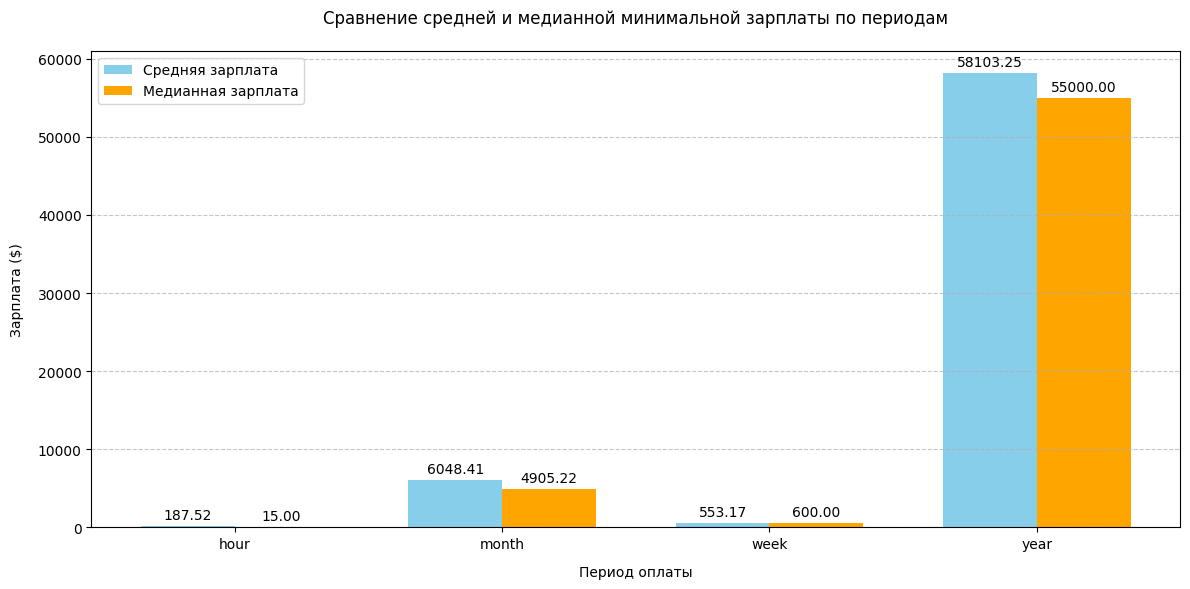

In [35]:
plt.figure(figsize=(12, 6))

# Группировка данных и расчет статистик
salary_stats = df.groupby('period')['min_salary'].agg(['mean', 'median'])

# Подготовка данных для графика
periods = salary_stats.index
x = np.arange(len(periods))
width = 0.35

# Создание столбцов
bars1 = plt.bar(x - width/2, salary_stats['mean'], width, label='Средняя зарплата', color='skyblue')
bars2 = plt.bar(x + width/2, salary_stats['median'], width, label='Медианная зарплата', color='orange')
plt.bar_label(bars1, fmt='%.2f', padding=3)
plt.bar_label(bars2, fmt='%.2f', padding=3)

# Настройка графика
plt.title('Сравнение средней и медианной минимальной зарплаты по периодам', pad=20)
plt.xlabel('Период оплаты', labelpad=10)
plt.ylabel('Зарплата ($)', labelpad=10)
plt.xticks(x, periods)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

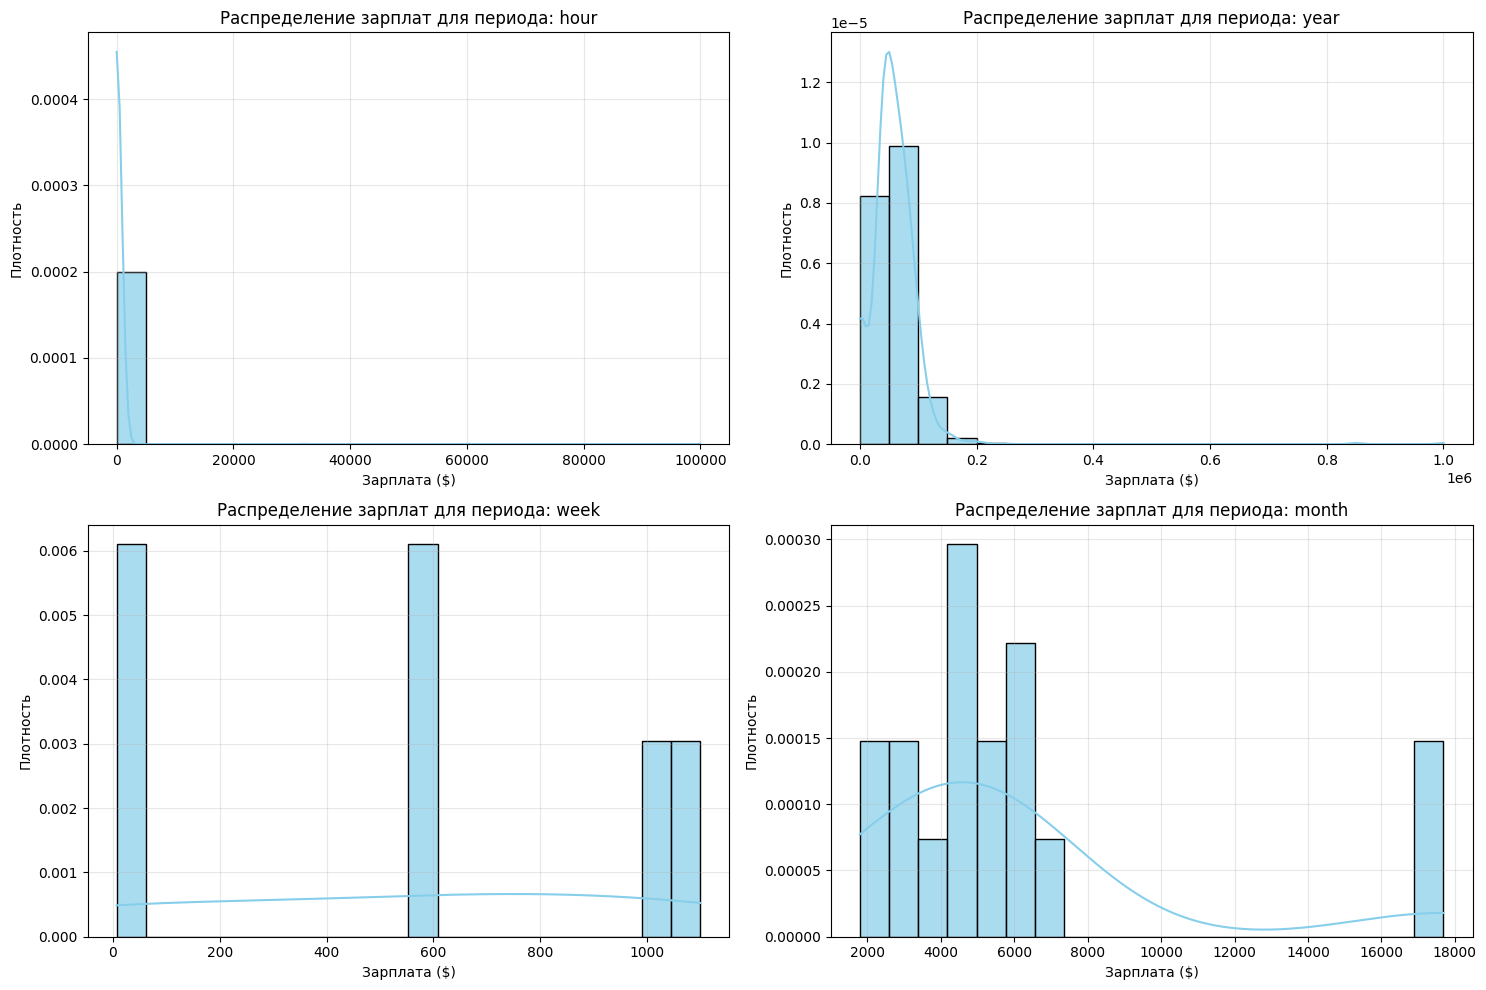

In [36]:
periods = df['period'].dropna().unique()
plt.figure(figsize=(15, 10))

for i, period in enumerate(periods, 1):
    plt.subplot(2, 2, i)
    period_data = df[df['period'] == period]['min_salary'].dropna()

    # Строим и KDE и гистограмму вместе с seaborn
    sns.histplot(period_data, bins=20, color='skyblue', edgecolor='black',
                 alpha=0.7, kde=True, stat='density')

    plt.title(f'Распределение зарплат для периода: {period}')
    plt.xlabel('Зарплата ($)')
    plt.ylabel('Плотность')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
period_means = df[df['period'].notna()].groupby('period')['min_salary'].mean()

df['assigned_period'] = pd.Series(dtype='object')

for index, row in df.iterrows():
    # Проверяем: 1) период не указан, 2) зарплата указана
    if pd.isna(row['period']) and pd.notna(row['min_salary']):
        salary_value = row['min_salary']
        closest_period = None
        min_distance = float('inf')
        equidistant = False

        # Вычисляем расстояния до средних значений каждого периода
        for period, mean_salary in period_means.items():
            distance = abs(salary_value - mean_salary)

            if distance < min_distance:
                min_distance = distance
                closest_period = period
                equidistant = False
            elif distance == min_distance:
                equidistant = True

        # Назначаем период только если он единственный ближайший
        if not equidistant:
            df.at[index, 'assigned_period'] = closest_period

# 4. Улучшенная статистика
print(f"Строк без периода и с зарплатой: {df[df['period'].isna()]['min_salary'].notna().sum()}")
print(f"Успешно назначены периоды: {df['assigned_period'].notna().sum()}")
print("\nРаспределение назначенных периодов:")
df['assigned_period'].dropna().value_counts(dropna=False)

Строк без периода и с зарплатой: 164
Успешно назначены периоды: 164

Распределение назначенных периодов:


,count
assigned_period,
hour,89
year,40
week,24
month,11


### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [38]:
print("Уникальные значения в job_type:")
df['job_type'].unique()

Уникальные значения в job_type:


array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [39]:
job_type_stats = df['job_type'].value_counts(dropna=False)
print("Распределение значений:")
job_type_stats

Распределение значений:


,count
job_type,
Full Time,6757
Full Time Employee,6617
"Full Time, Employee",3360
NaN,1628
Full Time Temporary/Contract/Project,1062
"Full Time, Temporary/Contract/Project",533
"Full Time , Employee",406
Part Time Employee,382
Part Time,329


Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

In [40]:
print("Проблемные случаи:")
non_standard = df[~df['job_type'].isin(['Full Time', 'Part Time', 'Per Diem' 'Temporary/Contract/Project', 'Employee'])]
non_standard['job_type'].unique()

Проблемные случаи:


array(['Full Time Employee', 'Full Time, Employee', 'Part Time Employee',
       nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract/Project',
       'Full Time / Tempora

In [41]:
def extract_employment_type(job_type):
    if pd.isna(job_type):
        return ('Full Time', 'Employee')

    job_type = str(job_type).strip()

    # Определяем полноту занятости
    if re.search(r'full[\s-]?time', job_type, re.I):
        completeness = 'Full Time'
    elif re.search(r'part[\s-]?time', job_type, re.I):
        completeness = 'Part Time'
    elif re.search(r'per[\s-]?diem', job_type, re.I):
        completeness = 'Per Diem'
    else:
        completeness = 'Full Time'
    if re.search(r'employee', job_type, re.I):
        employment_type = 'Employee'
    elif re.search(r'intern', job_type, re.I):
        employment_type = 'Intern'
    elif re.search(r'temp|contract|project', job_type, re.I):
        employment_type = 'Temporary/Contract/Project'
    elif re.search(r'exempt', job_type, re.I):
        employment_type = 'Exempt'
    else:
        employment_type = 'Employee'

    return (completeness, employment_type)

df[['employment_completeness', 'employment_type']] = pd.DataFrame(
    df['job_type'].apply(extract_employment_type).tolist(),
    index=df.index)

cross_tab = pd.crosstab(
    index=df['employment_completeness'],
    columns=df['employment_type'],
    margins=True,
    margins_name="Всего"
)

print("Таблица распределения типов занятости:")
cross_tab

Таблица распределения типов занятости:


employment_type,Employee,Exempt,Intern,Temporary/Contract/Project,Всего
employment_completeness,,,,,
Full Time,19087,1,5,1847,20940
Part Time,933,0,3,57,993
Per Diem,63,0,0,4,67
Всего,20083,1,8,1908,22000


<Figure size 1200x600 with 0 Axes>

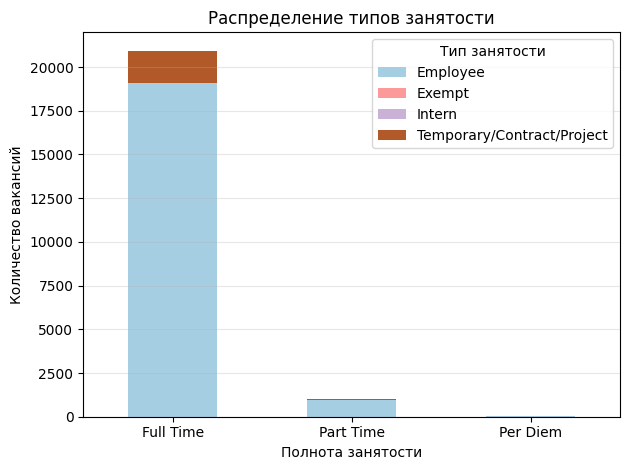

In [42]:
plot_data = df.groupby(['employment_completeness', 'employment_type']).size().unstack()
plt.figure(figsize=(12, 6))
plot_data.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Распределение типов занятости')
plt.xlabel('Полнота занятости')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)
plt.legend(title='Тип занятости')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.